In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "bayesian_network"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
1,-0.016412,-0.044642,-0.023451,-0.071085,0.020446,-0.010082,-0.024993,0.034309,0.085533,0.081764,92.0
2,0.005383,0.050680,-0.045007,0.057449,-0.000193,-0.015719,0.074412,-0.050564,0.038393,0.007207,185.0
3,0.009016,0.050680,-0.009439,-0.005671,0.014942,0.044719,-0.061809,0.071210,0.009436,-0.013504,59.0
4,0.023546,0.050680,-0.009439,-0.040099,-0.037344,-0.021669,0.011824,-0.002592,-0.033249,-0.054925,60.0
5,0.009016,0.050680,-0.024529,-0.026328,-0.007073,-0.005072,-0.047082,0.034309,0.023375,-0.038357,292.0
6,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062913,-0.054925,72.0
7,-0.038207,0.050680,0.071397,-0.057314,0.153914,0.155887,0.000779,0.071948,0.050276,0.069338,220.0
8,-0.038207,0.050680,0.069241,0.059744,-0.029088,-0.023234,-0.047082,-0.039493,0.103292,-0.021788,277.0
9,-0.060003,0.050680,0.015350,-0.019442,0.036958,0.048164,0.019187,-0.002592,-0.030751,-0.001078,96.0


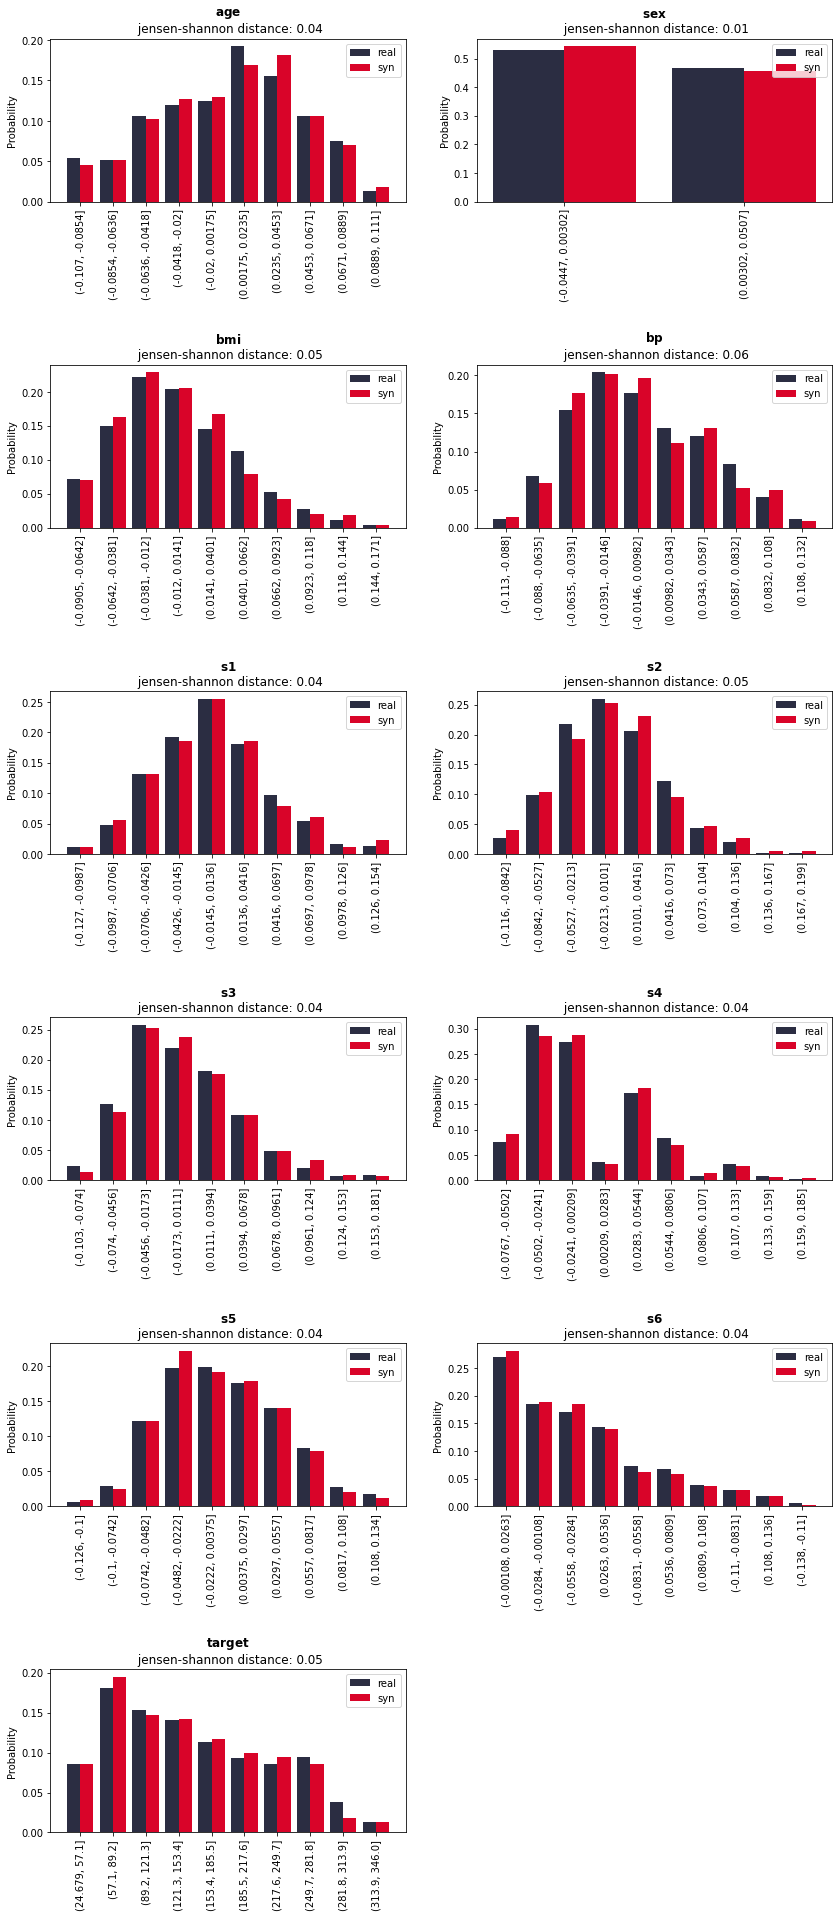

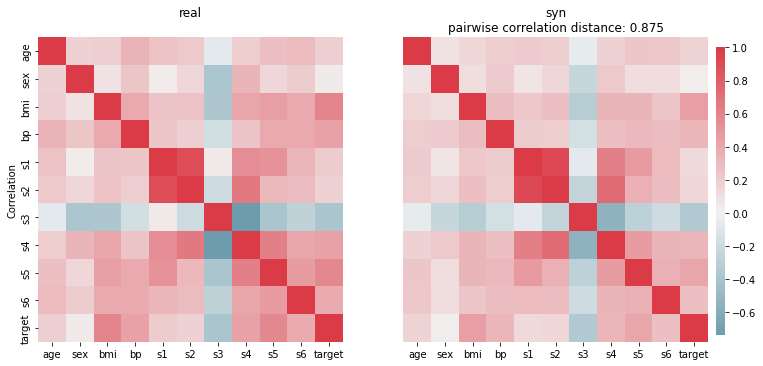

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : bayesian_network


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.278281,0.298643,0.288084,0.00833,0.28733,0.010181,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.030548,0.04367,0.038909,0.005932,0.04251,0.006561,3,0,0.01
sanity.inlier_probability,0.90724,0.966063,0.945701,0.027212,0.963801,0.029412,3,0,0.01
sanity.outlier_probability,0.002262,0.006787,0.003771,0.002133,0.002262,0.002262,3,0,0.01
statistical.inverse_kl_divergence,0.980651,0.986488,0.98453,0.002743,0.98645,0.002918,3,0,0.02
statistical.kolmogorov_smirnov_test,0.964624,0.966886,0.965926,0.000955,0.966269,0.001131,3,0,0.03
statistical.chi_squared_test,0.816865,0.907774,0.87703,0.042547,0.906453,0.045455,3,0,0.03
statistical.maximum_mean_discrepancy,0.001886,0.00277,0.002352,0.000363,0.002401,0.000442,3,0,0.04
statistical.inverse_cdf_distance,1.705132,1.733553,1.721904,0.012155,1.727028,0.01421,3,0,6.46
